# Cereal Dataset
## Numpy and Pandas Notebook

The complete dataset can be found here: [Kaggle](https://www.kaggle.com/crawford/80-cereals)

|Variable | Description|
|:--------|:-----------|
|Name| Name of cereal
|mfr| Manufacturer of cereal|
|type| hot or cold|   
|calories| calories per serving|
|protein| grams of protein|
|fat| grams of fat|
|sodium| milligrams of sodium|
|fiber| grams of dietary fiber|
|carbo| grams of complex carbohydrates|
|sugars| grams of sugars|
|potass| milligrams of potassium|
|vitamins| vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended|
|shelf| display shelf (1, 2, or 3, counting from the floor)|
|weight| weight in ounces of one serving|
|cups| number of cups in one serving|
|rating| a rating of the cereals (Possibly from Consumer Reports?)|

# Exploration

### Initial Imports

In [1]:
# import common libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# load data from csv

data = pd.read_csv('cereal.csv', index_col = 'name') #ensure file is in same location as notebook or add path

First look at `cereal`

In [3]:
# head

data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
# shape

data.shape

(77, 15)

77 observations, 15 variables

Now lets see what the columns are named:

In [5]:
# columns

for i in data.columns:
    print(i)

mfr
type
calories
protein
fat
sodium
fiber
carbo
sugars
potass
vitamins
shelf
weight
cups
rating


There are several ways to get a quick view of your data:

* the `head()` method (seen above) provides a quick look at the first several rows of your data
* the `info()` method provides a brief summary of your DataFrame including non-null count and data types
* the `describe()` method provides descriptive statistics of numerical data 

In [6]:
# info

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 100% Bran to Wheaties Honey Gold
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mfr       77 non-null     object 
 1   type      77 non-null     object 
 2   calories  77 non-null     int64  
 3   protein   77 non-null     int64  
 4   fat       77 non-null     int64  
 5   sodium    77 non-null     int64  
 6   fiber     77 non-null     float64
 7   carbo     77 non-null     float64
 8   sugars    77 non-null     int64  
 9   potass    77 non-null     int64  
 10  vitamins  77 non-null     int64  
 11  shelf     77 non-null     int64  
 12  weight    77 non-null     float64
 13  cups      77 non-null     float64
 14  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(2)
memory usage: 9.6+ KB


In [7]:
# describe

data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
# number of observations

len(data)

77

In [9]:
# descriptives for calories

data.calories.describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

We can view unique values using `unique()` and identify the counts using `value_counts()`

Let's look at manufacturer 

In [10]:
# unique manufacturers

data.mfr.unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [11]:
# manufacturer value counts

data.mfr.value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [12]:
# pivot table for calories by manufacturer

data.pivot_table('calories', 'mfr')

,calories
mfr,
A,100.000000
G,111.363636
K,108.695652
N,86.666667
P,108.888889
Q,95.000000
R,115.000000


In [13]:
# pivot table for calories by manufacturer by type

data.pivot_table('calories', 'mfr', 'type')

type,C,H
mfr,,
A,NaN,100.0
G,111.363636,NaN
K,108.695652,NaN
N,84.000000,100.0
P,108.888889,NaN
Q,94.285714,100.0
R,115.000000,NaN


# Selecting columns

We're interested in calories, manufacturer, cups, rating, and cost (which doesn't yet exist)

In [14]:
# select variables of interest - including cost

data2 = pd.DataFrame(data, columns = ['calories', 'mfr', 'cups', 'rating', 'cost'])
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,NaN
100% Natural Bran,120,Q,1.00,33.983679,NaN
All-Bran,70,K,0.33,59.425505,NaN
All-Bran with Extra Fiber,50,K,0.50,93.704912,NaN
Almond Delight,110,R,0.75,34.384843,NaN
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,NaN
Trix,110,G,1.00,27.753301,NaN
Wheat Chex,100,R,0.67,49.787445,NaN


Notice `cost` = NaN because it didn't exist before selecting it

In [15]:
# this doesn't work (not including cost)

data['calories', 'mfr', 'cups', 'rating']

KeyError: ('calories', 'mfr', 'cups', 'rating')

In [16]:
# select multiple variables - but not cost

data[['calories', 'mfr', 'cups', 'rating']]

,calories,mfr,cups,rating
name,,,,
100% Bran,70,N,0.33,68.402973
100% Natural Bran,120,Q,1.00,33.983679
All-Bran,70,K,0.33,59.425505
All-Bran with Extra Fiber,50,K,0.50,93.704912
Almond Delight,110,R,0.75,34.384843
...,...,...,...,...
Triples,110,G,0.75,39.106174
Trix,110,G,1.00,27.753301
Wheat Chex,100,R,0.67,49.787445


In [17]:
# this doesn't work, either

data[['calories', 'mfr', 'cups', 'rating', 'cost']]

KeyError: "['cost'] not in index"

In [18]:
# set cost to $3.50

data2['cost'] = 3.5
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,3.5
100% Natural Bran,120,Q,1.00,33.983679,3.5
All-Bran,70,K,0.33,59.425505,3.5
All-Bran with Extra Fiber,50,K,0.50,93.704912,3.5
Almond Delight,110,R,0.75,34.384843,3.5
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.5
Trix,110,G,1.00,27.753301,3.5
Wheat Chex,100,R,0.67,49.787445,3.5


In [19]:
# create random values for cost

np.random.seed(56)

costs = np.random.uniform(low = 2.5, high = 4.5, size = (len(data2))).round(2)

data2['cost'] = costs
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,4.47
100% Natural Bran,120,Q,1.00,33.983679,3.17
All-Bran,70,K,0.33,59.425505,3.85
All-Bran with Extra Fiber,50,K,0.50,93.704912,2.89
Almond Delight,110,R,0.75,34.384843,3.21
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.37
Trix,110,G,1.00,27.753301,3.31
Wheat Chex,100,R,0.67,49.787445,3.17


In [61]:
# when assigning values, they must be the correct size
# notice here we have 78 values, not 77, which will cause an error

np.random.seed(56)

costs2 = np.random.uniform(low = 2.5, high = 4.5, size = (77)).round(2)
data2['cost'] = costs2

data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,4.47
100% Natural Bran,120,Q,1.00,33.983679,3.17
All-Bran,70,K,0.33,59.425505,3.85
All-Bran with Extra Fiber,50,K,0.50,93.704912,2.89
Almond Delight,110,R,0.75,34.384843,3.21
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.37
Trix,110,G,1.00,27.753301,3.31
Wheat Chex,100,R,0.67,49.787445,3.17


Now we want identify only those with values greater than 3.50m

In [62]:
# create new boolean where costs > 3.5

data2['cost2'] = data2['cost'] > 3.5

data2

,calories,mfr,cups,rating,cost,cost2
name,,,,,,
100% Bran,70,N,0.33,68.402973,4.47,True
100% Natural Bran,120,Q,1.00,33.983679,3.17,False
All-Bran,70,K,0.33,59.425505,3.85,True
All-Bran with Extra Fiber,50,K,0.50,93.704912,2.89,False
Almond Delight,110,R,0.75,34.384843,3.21,False
...,...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.37,False
Trix,110,G,1.00,27.753301,3.31,False
Wheat Chex,100,R,0.67,49.787445,3.17,False


In [22]:
# let's use `del` to delete `cost2` - we don't need it

del data2['cost2']
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,4.47
100% Natural Bran,120,Q,1.00,33.983679,3.17
All-Bran,70,K,0.33,59.425505,3.85
All-Bran with Extra Fiber,50,K,0.50,93.704912,2.89
Almond Delight,110,R,0.75,34.384843,3.21
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.37
Trix,110,G,1.00,27.753301,3.31
Wheat Chex,100,R,0.67,49.787445,3.17


In [23]:
# we can index our original dataset using this value, as well

data3 = data2[data2['cost']>3.5]

data3.head()

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,4.47
All-Bran,70,K,0.33,59.425505,3.85
Apple Cinnamon Cheerios,110,G,0.75,29.509541,4.13
Bran Chex,90,R,0.67,49.120253,4.25
Cinnamon Toast Crunch,120,G,0.75,19.823573,4.17


In [24]:
print(data2['cost']>3.5)

name
100% Bran                     True
100% Natural Bran            False
All-Bran                      True
All-Bran with Extra Fiber    False
Almond Delight               False
                             ...  
Triples                      False
Trix                         False
Wheat Chex                   False
Wheaties                     False
Wheaties Honey Gold          False
Name: cost, Length: 77, dtype: bool


### Selecting rows

As with selecting columns, there are frequently multiple ways to accomplish tasks

To select observations we can use `.loc` and `.iloc`

`.loc` = axis labels

`.iloc` = integers

In [25]:
data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [26]:
data.loc['All-Bran']

mfr                 K
type                C
calories           70
protein             4
fat                 1
sodium            260
fiber             9.0
carbo             7.0
sugars              5
potass            320
vitamins           25
shelf               3
weight            1.0
cups             0.33
rating      59.425505
Name: All-Bran, dtype: object

In [27]:
data.iloc[2]

mfr                 K
type                C
calories           70
protein             4
fat                 1
sodium            260
fiber             9.0
carbo             7.0
sugars              5
potass            320
vitamins           25
shelf               3
weight            1.0
cups             0.33
rating      59.425505
Name: All-Bran, dtype: object

We can select values by indicating the row(s) and column(s) we're interested in

In [28]:
data.loc['All-Bran', 'fiber']

9.0

In [29]:
# use brackets instead of parentheses as shown in module video to prevent later problems
data.loc[['All-Bran', 'Almond Delight'], 'fiber']

name
All-Bran          9.0
Almond Delight    1.0
Name: fiber, dtype: float64

In [30]:
# use brackets instead of parentheses as shown in module video to prevent later problems
data.loc[['All-Bran', 'Almond Delight'], ['fiber', 'mfr']]

,fiber,mfr
name,,
All-Bran,9.0,K
Almond Delight,1.0,R


# Reinforcement

#### Student Practice
Pause the video and try to perform the following tasks on the `cereal` dataset. Then check your answers as I walk through the solutions. 

**Exercise:** Select only the `protein` column from the data.

In [31]:
# select only variable protein

data['protein']

name
100% Bran                    4
100% Natural Bran            3
All-Bran                     4
All-Bran with Extra Fiber    4
Almond Delight               2
                            ..
Triples                      2
Trix                         1
Wheat Chex                   3
Wheaties                     3
Wheaties Honey Gold          2
Name: protein, Length: 77, dtype: int64

**Exercise:** Select the `fat`, `calories`, and `sugars` columns from the data.

In [32]:
# select only variables fat, calories, sugars

data[['fat', 'calories', 'sugars']]

,fat,calories,sugars
name,,,
100% Bran,1,70,6
100% Natural Bran,5,120,8
All-Bran,1,70,5
All-Bran with Extra Fiber,0,50,0
Almond Delight,2,110,8
...,...,...,...
Triples,1,110,3
Trix,1,110,12
Wheat Chex,1,100,3


**Exercise:** Select the following observations from the data: `Cocoa Puffs`, `Frosted Flakes`, and `Fruity Pebbles`.

In [33]:
# select observations Cocoa Puffs, Frosted Flakes, and Fruity Pebbles

data.loc[['Cocoa Puffs', 'Frosted Flakes', 'Fruity Pebbles']]

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.0,1.00,22.736446
Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.435973
Fruity Pebbles,P,C,110,1,1,135,0.0,13.0,12,25,25,2,1.0,0.75,28.025765


**Exercise:** Select the cereals that have `fiber` greater than 10.

In [34]:
# select variable fiber where values are greater than 10

data.loc[data['fiber']>10]

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


**Exercise:** Import the csv file called `myratings.csv` and save it as a DataFrame called `myratings`.

In [35]:
# import myratings.csv

myratings=pd.read_csv('myratings.csv')

**Exercise:** Output the `myratings` DataFrame.  How many rows of data do we have?  Can you figure out why we do not have 77 rows as we did in the original `cereal` data?

In [36]:
# what do we have?

myratings

,myrating
0,1
1,2
2,3
3,3
4,3
5,3
6,5
7,3
8,3
9,2


**Exercise:** Check [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to determine what is the default for handling blank lines of data.  How could you change this to interpret blank lines as NaN values instead of skipping them?

Import the `myratings.csv` file again, saving it was `myratings`, but this time making sure that blank lines are treated as missing values.

In [37]:
# import myratings.csv

myratings=pd.read_csv('myratings.csv', skip_blank_lines=False)
myratings

,myrating
0,1.0
1,NaN
2,NaN
3,NaN
4,2.0
...,...
72,NaN
73,1.0
74,NaN
75,3.0


**Exercise:** Set the index of `myratings` as the same as the index of the `cereal` data (created as `data` above).

In [38]:
# set index to cereal name

myratings.set_index(data.index, inplace=True)
myratings

,myrating
name,
100% Bran,1.0
100% Natural Bran,NaN
All-Bran,NaN
All-Bran with Extra Fiber,NaN
Almond Delight,2.0
...,...
Triples,NaN
Trix,1.0
Wheat Chex,NaN


**Exercise:** How many missing values are represented in the `myratings` data?

In [39]:
# count missing values

myratings.isnull().sum()

myrating    45
dtype: int64

**Exercise:** Merge the `data` DataFrame and the `myratings` DataFrame.

In [40]:
# merge myratings with original dataframe

data=pd.merge(data, myratings, on = 'name')
data

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating
name,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,1.0
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,NaN
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,NaN
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,NaN
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,NaN
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,1.0
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,NaN


**Exercise:** The `myrating` attribute is on a scale of 1-5 while the rating attribute from the original data is on a scale of 0-100.  

Create a new column called `myrating20` that multiplies the `myrating` column by 20 so that is has the same scale as the original data.

In [41]:
# multiply myrating variable by 20

data['myrating']=data['myrating']*20
data

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating
name,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,20.0
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,NaN
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,NaN
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,NaN
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,NaN
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,20.0
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,NaN


**Exercise:** What is the difference between the original `rating` column and the `myrating20` column?  Create a new column called `diff` that subtracts the `myrating20` column from the `rating` column.

In [42]:
# calculate difference 

data['diff']=data['rating']=data['myrating']
data

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,diff
name,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,20.0,20.0,20.0
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,NaN,NaN,NaN
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,NaN,NaN,NaN
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,NaN,NaN,NaN
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,40.0,40.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,NaN,NaN,NaN
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,20.0,20.0,20.0
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,NaN,NaN,NaN


**Exercise:** Find the cereals with the five largest differences values.

In [43]:
# find five largest differences

data.nlargest(5,['diff'])

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,diff
name,,,,,,,,,,,,,,,,,
Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75,100.0,100.0,100.0
Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,100.0,100.0,100.0
Fruity Pebbles,P,C,110,1,1,135,0.0,13.0,12,25,25,2,1.00,0.75,100.0,100.0,100.0
Honey Nut Cheerios,G,C,110,3,1,250,1.5,11.5,10,90,25,1,1.00,0.75,100.0,100.0,100.0
Raisin Bran,K,C,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,100.0,100.0,100.0


## Create per cup amounts

#### Student Practice
Pause the video and try to perform the following tasks on the `cereal` dataset. Then check your answers as I walk through the solutions. 

**Exercise:** Create four new variables called:

* `calPerCup` - calories per cup
* `proPerCup` - protein per cup
* `fatPerCup` - fat per cup
* `sugPerCup` - sugar per cup

All created by taking the variable and dividing by cups (e.g., calories/cups)

In [44]:
# create 'calPerCup', 'proPerCup', 'fatPerCup', 'sugPerCup' variables as ratio of variable to cups

data['calPerCup']=data['calories']/data['cups']
data['proPerCup']=data['protein']/data['cups']
data['calPerCup']=data['fat']/data['cups']
data['calPerCup']=data['sugars']/data['cups']

**Exercise:** Create a scatterplot of `calories` by `calPerCup`.  You can use Matplotlib or Seaborn.

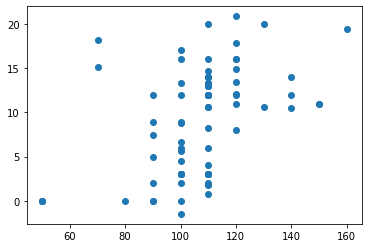

In [72]:
# create scatterplot for calories by calPerCup
import matplotlib.pyplot as plt
plt.scatter(y=data['calPerCup'],x=data['calories'])
plt.show()

**Exercise:** Which cereal has the highest calories per cup?

In [46]:
# which cereal had the highest calories per cup?

mostCalCup=data.nlargest(1,['calPerCup'])
mostCalCup

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,diff,calPerCup,proPerCup
name,,,,,,,,,,,,,,,,,,,
Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,80.0,80.0,80.0,20.895522,4.477612


## Sorting

**Exercise:** Sort `data` by index.

In [47]:
# sort index alphabetically

data.sort_index()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,diff,calPerCup,proPerCup
name,,,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,20.0,20.0,20.0,18.181818,12.121212
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,NaN,NaN,NaN,8.000000,3.000000
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,NaN,NaN,NaN,15.151515,12.121212
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,NaN,NaN,NaN,0.000000,8.000000
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,40.0,40.0,40.0,10.666667,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,NaN,NaN,NaN,4.000000,2.666667
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,20.0,20.0,20.0,12.000000,1.000000
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,NaN,NaN,NaN,4.477612,4.477612


**Exercise:** Sort the columns alphabetically.

In [48]:
# sort columns

data.sort_index(axis=1)

,calPerCup,calories,carbo,cups,diff,fat,fiber,mfr,myrating,potass,proPerCup,protein,rating,shelf,sodium,sugars,type,vitamins,weight
name,,,,,,,,,,,,,,,,,,,
100% Bran,18.181818,70,5.0,0.33,20.0,1,10.0,N,20.0,280,12.121212,4,20.0,3,130,6,C,25,1.0
100% Natural Bran,8.000000,120,8.0,1.00,NaN,5,2.0,Q,NaN,135,3.000000,3,NaN,3,15,8,C,0,1.0
All-Bran,15.151515,70,7.0,0.33,NaN,1,9.0,K,NaN,320,12.121212,4,NaN,3,260,5,C,25,1.0
All-Bran with Extra Fiber,0.000000,50,8.0,0.50,NaN,0,14.0,K,NaN,330,8.000000,4,NaN,3,140,0,C,25,1.0
Almond Delight,10.666667,110,14.0,0.75,40.0,2,1.0,R,40.0,-1,2.666667,2,40.0,3,200,8,C,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,4.000000,110,21.0,0.75,NaN,1,0.0,G,NaN,60,2.666667,2,NaN,3,250,3,C,25,1.0
Trix,12.000000,110,13.0,1.00,20.0,1,0.0,G,20.0,25,1.000000,1,20.0,2,140,12,C,25,1.0
Wheat Chex,4.477612,100,17.0,0.67,NaN,1,3.0,R,NaN,115,4.477612,3,NaN,1,230,3,C,25,1.0


**Exercise:** Sort the columns in descending order alphabetically.

In [49]:
# sort in descending order

data.sort_index(axis=1, ascending=False)

,weight,vitamins,type,sugars,sodium,shelf,rating,protein,proPerCup,potass,myrating,mfr,fiber,fat,diff,cups,carbo,calories,calPerCup
name,,,,,,,,,,,,,,,,,,,
100% Bran,1.0,25,C,6,130,3,20.0,4,12.121212,280,20.0,N,10.0,1,20.0,0.33,5.0,70,18.181818
100% Natural Bran,1.0,0,C,8,15,3,NaN,3,3.000000,135,NaN,Q,2.0,5,NaN,1.00,8.0,120,8.000000
All-Bran,1.0,25,C,5,260,3,NaN,4,12.121212,320,NaN,K,9.0,1,NaN,0.33,7.0,70,15.151515
All-Bran with Extra Fiber,1.0,25,C,0,140,3,NaN,4,8.000000,330,NaN,K,14.0,0,NaN,0.50,8.0,50,0.000000
Almond Delight,1.0,25,C,8,200,3,40.0,2,2.666667,-1,40.0,R,1.0,2,40.0,0.75,14.0,110,10.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,1.0,25,C,3,250,3,NaN,2,2.666667,60,NaN,G,0.0,1,NaN,0.75,21.0,110,4.000000
Trix,1.0,25,C,12,140,2,20.0,1,1.000000,25,20.0,G,0.0,1,20.0,1.00,13.0,110,12.000000
Wheat Chex,1.0,25,C,3,230,1,NaN,3,4.477612,115,NaN,R,3.0,1,NaN,0.67,17.0,100,4.477612


**Exercise:** Sort the data by the `calories` column.

In [50]:
# sort by different columns

data.sort_values(by='calories')

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,diff,calPerCup,proPerCup
name,,,,,,,,,,,,,,,,,,,
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,NaN,NaN,NaN,0.000000,8.000000
Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,NaN,NaN,NaN,0.000000,1.000000
Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,NaN,NaN,NaN,0.000000,2.000000
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,20.0,20.0,20.0,18.181818,12.121212
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,NaN,NaN,NaN,15.151515,12.121212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nutri-Grain Almond-Raisin,K,C,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67,NaN,NaN,NaN,10.447761,4.477612
Just Right Fruit & Nut,K,C,140,3,1,170,2.0,20.0,9,95,100,3,1.30,0.75,NaN,NaN,NaN,12.000000,4.000000
Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.00,1.00,NaN,NaN,NaN,11.000000,4.000000


**Exercise:** Sort the data by `calories` and then `mfr`.

In [51]:
# sort by multiple columns

data.sort_values(by=['calories', 'mfr'])

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,diff,calPerCup,proPerCup
name,,,,,,,,,,,,,,,,,,,
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,NaN,NaN,NaN,0.000000,8.000000
Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,NaN,NaN,NaN,0.000000,1.000000
Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,NaN,NaN,NaN,0.000000,2.000000
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,NaN,NaN,NaN,15.151515,12.121212
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,20.0,20.0,20.0,18.181818,12.121212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Just Right Fruit & Nut,K,C,140,3,1,170,2.0,20.0,9,95,100,3,1.30,0.75,NaN,NaN,NaN,12.000000,4.000000
Nutri-Grain Almond-Raisin,K,C,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67,NaN,NaN,NaN,10.447761,4.477612
Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.00,1.00,NaN,NaN,NaN,11.000000,4.000000


## Descriptive stats

Many descriptive stats are available quickly - although you should be careful 

**Exercise:** Sum the entire data by column.

In [52]:
# sum for all variables

data.sum()

mfr          NQKKRGKGRPQGGGGRKKGKNKGRKKKPKPPGPPPQGPKKGQGARR...
type         CCCCCCCCCCCCCCCCCCCCHCCCCCCCCCCCCCCCCCCCCCCHCC...
calories                                                  8230
protein                                                    196
fat                                                         78
sodium                                                   12295
fiber                                                    165.7
carbo                                                   1124.0
sugars                                                     533
potass                                                    7398
vitamins                                                  2175
shelf                                                      170
weight                                                   79.28
cups                                                     63.22
rating                                                  2020.0
myrating                                               

**Exercise:** Sum the `calories` column only.

In [53]:
# sum of calories

data.calories.sum()

8230

**Exercise:** Calculate the standard deviation by column.

In [54]:
# std for all variables

data.std()

C:\Users\fiber\AppData\Local\Temp/ipykernel_16624/3911933190.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


calories     19.484119
protein       1.094790
fat           1.006473
sodium       83.832295
fiber         2.383364
carbo         4.278956
sugars        4.444885
potass       71.286813
vitamins     22.342523
shelf         0.832524
weight        0.150477
cups          0.232716
rating       24.420708
myrating     24.420708
diff         24.420708
calPerCup     5.985441
proPerCup     2.499900
dtype: float64

**Exercise:** Calculate the standard deviation for the `calories` column.

In [55]:
# std of calories

data['calories'].std()

19.48411905682084

**Exercise:** Sum all variables by observation.  Note that the information here is for illustrative purposes only and the output is not useful.

In [56]:
# sum by observation
# the output here is non useful - only for illustrative purposes

data.sum(axis='columns')

C:\Users\fiber\AppData\Local\Temp/ipykernel_16624/2250667755.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.sum(axis='columns')


name
100% Bran                    625.633030
100% Natural Bran            312.000000
All-Bran                     732.602727
All-Bran with Extra Fiber    583.500000
Almond Delight               499.083333
                                ...    
Triples                      483.416667
Trix                         404.000000
Wheat Chex                   508.625224
Wheaties                     651.000000
Wheaties Honey Gold          559.083333
Length: 77, dtype: float64

Some methods are not direct stats - but use them

**Exercise:**  What is the index value of the cereal that has the maximum calories?

In [57]:
# identify index value of maximum for calories

data.calories.idxmax()

'Mueslix Crispy Blend'

**Exercise:** What is the index value of the cereal that has the minimum calories?

In [58]:
# identify index value of minimum for calories

data.calories.idxmin()

'All-Bran with Extra Fiber'

Correlation and covariance work well with DataFrames

**Exercise:** What is the correlation for all numeric variables in the data?

In [59]:
# correlation for all numeric variables in the df

data.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,diff,calPerCup,proPerCup
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,0.515270,0.515270,0.515270,0.454931,-0.147650
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.122558,0.122558,0.122558,-0.152155,0.698604
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,0.270226,0.270226,0.270226,0.330257,0.167308
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,0.012588,0.012588,0.012588,0.093967,-0.081261
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.046744,0.046744,0.046744,0.095049,0.674040
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,-0.135352,-0.135352,-0.135352,-0.420701,-0.330238
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,0.303967,0.303967,0.303967,0.865105,-0.237608
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.242193,0.242193,0.242193,0.245860,0.652837
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,0.303953,0.303953,0.303953,0.060221,-0.074182
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.199229,0.199229,0.199229,0.275862,0.316951


**Exercise:** What is the covariance for all numeric variables in the data?

In [60]:
# covariance for all numeric variables in the df

data.cov()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,diff,calPerCup,proPerCup
calories,379.630895,0.406699,9.777854,491.079973,-13.625427,20.899692,48.701299,-92.517088,115.516063,1.577239,2.040875,0.395386,147.983871,147.983871,147.983871,53.054578,-7.191800
protein,0.406699,1.198565,0.229665,-5.017943,1.305502,-0.613038,-1.601675,42.877990,0.179426,0.122010,0.035610,-0.062285,4.092742,4.092742,4.092742,-0.997044,1.911985
fat,9.777854,0.229665,1.012987,-0.456254,0.040106,-1.369703,1.211552,13.867396,-0.700615,0.220950,0.032505,-0.041198,5.806452,5.806452,5.806452,1.989531,0.420961
sodium,491.079973,-5.017943,-0.456254,7027.853725,-14.121070,127.696514,37.803315,-194.842789,677.054853,-4.865858,3.892635,2.334552,23.991935,23.991935,23.991935,47.150042,-17.030002
fiber,-13.625427,1.305502,0.040106,-14.121070,5.680424,-3.631442,-1.495899,153.485373,-1.716934,0.590379,0.088665,-0.284568,2.469758,2.469758,2.469758,1.355922,4.016044
carbo,20.899692,-0.613038,-1.369703,127.696514,-3.631442,18.309467,-6.308100,-106.665584,24.679597,-0.362611,0.087012,0.362397,-15.625000,-15.625000,-15.625000,-10.774766,-3.532545
sugars,48.701299,-1.601675,1.211552,37.803315,-1.495899,-6.308100,19.757006,6.874573,12.427375,0.371668,0.301417,-0.033471,34.354839,34.354839,34.354839,23.015773,-2.640248
potass,-92.517088,42.877990,13.867396,-194.842789,153.485373,-106.665584,6.874573,5081.809638,32.967362,21.404648,4.465689,-8.215082,440.262097,440.262097,440.262097,104.904154,116.342017
vitamins,115.516063,0.179426,-0.700615,677.054853,-1.716934,24.679597,12.427375,32.967362,499.188312,5.566473,1.076940,0.667635,110.383065,110.383065,110.383065,8.053386,-4.143372
shelf,1.577239,0.122010,0.220950,-4.865858,0.590379,-0.362611,0.371668,21.404648,5.566473,0.693096,0.023898,-0.064956,3.729839,3.729839,3.729839,1.374628,0.659648
